<a href="https://colab.research.google.com/github/teddy0413/Lab10/blob/main/%E6%B3%B0%E8%BF%AA%E3%84%89%E6%96%87%E5%AD%970614_DS4CS_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Member**
*   林家誠, 109306066, MIS
*   陳彥竹, 1093060xx, MIS



# **Title**
惡意連結的偵測分析

# **Problem Definition**
惡意連結時常出現在釣魚信件、惡意網站內，隨著科技的發展，惡意連結的樣貌也越來越難以辨認，且對於高齡化的社會，長被未必有如同青年人一樣的資訊敏感度，如何提早偵測出惡意連結，並在瀏覽器內就先幫助用戶擋掉，是一件值得研究的問題。因此，此次期末報告我們聚焦於利用機器學習、深度學習模型，製作出能夠分類出良好、網頁竄改、釣魚網頁與惡意軟體。

# **Dataset**
**Dataset**
我們的原始資料來自Kaggle，包含兩個欄位，[URL, Type]



# **description of your models**
**models**
**介紹**

【Data preprocessing】

最初在 Data EDA時，我們發現資料有Imbalanced的現象，Beningn的Data比其他類別多很多，為了確保每一個Batch放入的資料都有每個類別的資料，因此我們用UnderSampler設定每個樣本都擁有各類別32520個資料，總共130080筆資料。


【Feature Engineering】

我們用特徵工程的方法將資料的欄位增加，包含:

*   「連結長度」
*   「連結內是否有@、%、?、=」
*   「是否維HTTPS」，而我們將這類型的特徵稱為【Feature】




【Tokenizer + Embedder】

我們先將URL裡面的文字部分去除特殊字元，並將他們以"."坐分割，隨後將分好的tokenr獲得單詞之token ID，將token集合放入bert 模型生成1維768長度的值。我們將Embedder完產生的WordVector稱為【Wordvector】。


【AutoEncoder做降維】

因為經過Bert編碼後，768維的資料非常龐大，因此我們把資料放入AutoEncoder做降維，將Encodder Dimension設成200。

【實驗設計：資料的樣子】
此次實驗將資料分成三種：Feature Array, WordVector Array, Merged Array




# **result**

【Machine Learning】

在訓練模型的時候，我們放入了三種我們特徵工程完的資料，分別為
1. Feature資料
2. WordVector資料(已轉成向量文字資料)
3. Merged 資料(Feature + WordVector)

在挑選模型上，我們使用了以下三種模型做實驗
1. Decision Tree
2. Random Forest
3. XGBClassifier

實驗方式：將三種資料分別搭配上述三種模型看成效

實驗結果：發現Merged資料　+　XGBClissifier效果最好。


觀察：在看Decision Tree/Random Forest模型的表現時，可發現他們都不適合放入文字轉向量的資料，表現都很差，準確率落在65之間，不如它單單放Feature資料時準確率達到80以上。
而XGBClassifier雖然也在純Feature資料時表現得比純放WordVector還好，但它在Merged資料時達到1+1>2的精神，放入Merged的Accuracy為87>Feature的Accuracy84。
我們發現XGBClassifier比Decision Tree/Random Forest更適合處理非結構化數據(如文字)，因為XGBClassifier是採用Gradient Boosting Machine的原理，組合了多個樹(弱分類器)來購建一個大的分類器，而每下一棵樹都是修正前一棵樹的錯誤，因此樹根樹之間有關聯，因此減少了誤差與變異樹，更好地捕捉文本樹據中的關鍵信息。


【NN Model】

訓練過程：
我們使用EarlyStopping避免Overditting，設定的Stopping標準為＂Validation loss 如果連續五個epoch沒有下降＂就停止訓練。

除了與機器學習一樣，將三種資料分別加入我們的NNmodel 外，我們還額外做了一個新實驗：先訓練完Word Vector的模型，生成出訓練集每個url的4種類別機率，將其與Feature Array進行合成，並且再次訓練。反過來也做一遍。
做此實驗的目的是希望是不是將第一組資料訓練完的結果當作第二組訓練時提示，可以有效提高Accuracy。

結果：

從下方圖表可看出，沒有做特別訓練的模型Loss比較大，且Feature 和 WordVector資料的Accuracy都明顯比其他訓練方是低很多，因此可推測出此特別方法有提升Accuracy的效果。

除此之外，也可以看出NN Model是何處理WordVector文字向量資料，在使用含有文字向量的資料集時，Accuracy都比只用Feature資料時來的高，與機器學習的Model不同。

雖然先將 WordVector 放入模型產生機率，再結合Feature Array的模型的loss最低，但Accuracy為訓練時放入Merged data的模型，Accuracy 為 0.88。


# **discussion**
**介紹**


# 程式碼

## 安裝套件

In [ ]:
!pip install transformers
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 下載和解壓檔案

In [ ]:
import requests
import zipfile

url = 'https://github.com/Tonyrj3268/DS4CS-FinalProject/raw/main/archive.zip'
response = requests.get(url)
with open('archive.zip', 'wb') as file:
    file.write(response.content)
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

## 加載模組

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import string
from urllib.parse import urlparse
import re
from transformers import BertModel, BertTokenizer
import torch
from imblearn.under_sampling import RandomUnderSampler
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## gpu check

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


## 分析資料集

In [ ]:
df = pd.read_csv('/content/malicious_phish.csv')
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


由於資料集的label分配不均，且資料太過龐大(65萬筆)，使用欠採樣平衡數據集並且縮小訓練資料量，display = True僅供助教和展示時使用(限縮資料量成1萬筆)，原本呈現之結果為欠採樣後之訓練數量。


In [ ]:
display = True

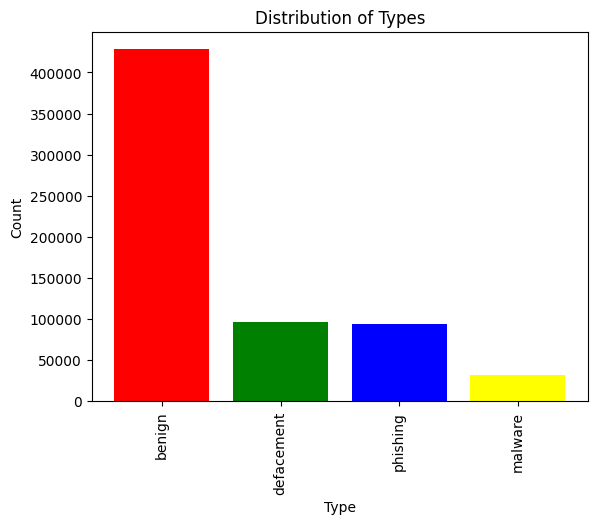

In [ ]:
category_counts = df['type'].value_counts()
colors = ['red', 'green', 'blue', 'yellow']
plt.bar(category_counts.index, category_counts.values, color=colors)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Distribution of Types")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X = df[['url']]
y = df['type']

under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

print("處理後的樣本數:", len(X_resampled))
print("處理後的樣本分佈:")
print(y_resampled.value_counts())

re_df = pd.concat([X_resampled, y_resampled], axis=1)
if display:
  re_df = re_df.sample(n=10000, random_state=42)

處理後的樣本數: 130080
處理後的樣本分佈:
benign        32520
defacement    32520
malware       32520
phishing      32520
Name: type, dtype: int64


# 預處理

## 特殊字符
計算特殊字符之數量，若完全沒該字符出現，則捨棄此字符欄位。

In [ ]:
special_chars = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '-', '+', '=',\
         '{', '}', '[', ']', '|', '\\', ':', ';', '<', '>', ',', '.', '?', '/', '`', '~']  # 定义特殊字符列表

for a in special_chars:
    re_df[a] = re_df['url'].apply(lambda i: i.count(a))
absent_chars = [char for char in special_chars if re_df[char].sum() == 0]
re_df.drop(columns=absent_chars, inplace=True)

## https 檢查 & url長度計算
檢查是否帶有https字串，如有則計為1。
計算url之總長度

In [ ]:
def httpSecure(url):
    http = urlparse(url).scheme
    match = str(http)
    if match=='https':
        return 1
    else:
        return 0
re_df['https'] = re_df['url'].apply(lambda i: httpSecure(i))
re_df['url_len'] = re_df['url'].apply(lambda i: len(str(i)))

In [ ]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 115240 to 117856
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      10000 non-null  object
 1   type     10000 non-null  object
 2   !        10000 non-null  int64 
 3   @        10000 non-null  int64 
 4   #        10000 non-null  int64 
 5   $        10000 non-null  int64 
 6   %        10000 non-null  int64 
 7   ^        10000 non-null  int64 
 8   &        10000 non-null  int64 
 9   *        10000 non-null  int64 
 10  (        10000 non-null  int64 
 11  )        10000 non-null  int64 
 12  _        10000 non-null  int64 
 13  -        10000 non-null  int64 
 14  +        10000 non-null  int64 
 15  =        10000 non-null  int64 
 16  {        10000 non-null  int64 
 17  }        10000 non-null  int64 
 18  [        10000 non-null  int64 
 19  ]        10000 non-null  int64 
 20  |        10000 non-null  int64 
 21  \        10000 non-null  int6

## 加載bert模型

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')#bert-base-uncased
model = BertModel.from_pretrained('bert-base-uncased').to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## 切割url
1.  將url的特殊字符去除，獲得剩餘單字詞的集合，例如:www.example.com => [www, example, com]。
2.  使用已訓練好的tokenizer獲得單詞之token ID，將token集合放入bert 模型生成1維768長度的值
3.  display mode預估訓練時間3分半

In [ ]:
def urlSplitBatch(urls):
    url_parts = [re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', ' ', url)).split(' ') for url in urls]
    tokens = [tokenizer.batch_encode_plus(parts, padding=True, truncation=True, return_tensors='pt') for parts in url_parts]
    input_ids = [token["input_ids"] for token in tokens]
    url_vectors = []
    for ids in input_ids:
      with torch.no_grad():
          ids = ids.to(device)
          last_hidden_states = model(ids)[0]
      url_vectors.append(last_hidden_states.mean(dim=[0, 1]).unsqueeze(0))

    url_vectors = torch.cat(url_vectors, dim=0).to(device)
    return url_vectors


# 在主要迴圈中使用批次處理
BATCH_SIZE = 1000 # 你可以根據你的硬體配置和需求來調整批次的大小
word_vector = []
rows_to_drop = []
total = len(re_df['url'])
checkpoint = total // 100
for start in range(0, total, BATCH_SIZE):
  end = min(start + BATCH_SIZE, total)
  batch_indices = re_df.index[start:end]
  batch = re_df['url'].loc[batch_indices]
  try:
    split_urls = urlSplitBatch(batch)  # 對整個批次進行split操作
  except:
    print(f"第{start}批資料集發生錯誤，跳過並移除")
    rows_to_drop.extend(batch_indices)  # 若split操作失敗，將整個批次的索引加入要刪除的列表
    continue

  list_from_tensor = split_urls.tolist()
  word_vector.extend(list_from_tensor)

  if end % checkpoint == 0:
      print("已完成：{:.0f}%".format(end / total * 100))

已完成：10%
已完成：20%
已完成：30%
已完成：40%
已完成：50%
已完成：60%
已完成：70%
已完成：80%
已完成：90%
已完成：100%


In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(AutoEncoder, self).__init__()
        mid_dim = (input_dim + encoding_dim) // 2  # add an intermediate layer with average dimension

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, mid_dim),
            nn.ReLU(),
            nn.Linear(mid_dim, encoding_dim),
            nn.ReLU()
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, mid_dim),
            nn.ReLU(),
            nn.Linear(mid_dim, input_dim),
        )

    def forward(self, x):
        x = torch.relu(self.encoder(x))
        x = self.decoder(x)
        return x


In [ ]:
input_dim = len(word_vector[0])  # number of features
encoding_dim = 200  # desired dimension after encoding

model = AutoEncoder(input_dim, encoding_dim).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())
EPOCHES = 20

features = torch.from_numpy(np.array(word_vector)).float().to(device)
dataset = TensorDataset(features)
data_loader = DataLoader(dataset, batch_size=128, shuffle=True)

for epoch in range(EPOCHES):
    for feature in data_loader:
        # forward
        outputs = model(feature[0])
        loss = criterion(outputs, feature[0])

        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{EPOCHES}], Loss: {loss.item():.4f}')
with torch.no_grad():
    encoded_data = model.encoder(features)

Epoch [1/20], Loss: 0.0044
Epoch [2/20], Loss: 0.0024
Epoch [3/20], Loss: 0.0025
Epoch [4/20], Loss: 0.0013
Epoch [5/20], Loss: 0.0017
Epoch [6/20], Loss: 0.0015
Epoch [7/20], Loss: 0.0009
Epoch [8/20], Loss: 0.0029
Epoch [9/20], Loss: 0.0015
Epoch [10/20], Loss: 0.0019
Epoch [11/20], Loss: 0.0013
Epoch [12/20], Loss: 0.0012
Epoch [13/20], Loss: 0.0013
Epoch [14/20], Loss: 0.0009
Epoch [15/20], Loss: 0.0015
Epoch [16/20], Loss: 0.0014
Epoch [17/20], Loss: 0.0013
Epoch [18/20], Loss: 0.0012
Epoch [19/20], Loss: 0.0013
Epoch [20/20], Loss: 0.0014


## 切分成3種特徵
1.  純單字詞矩陣
2.  純原url之特徵矩陣
3.  上面兩種之結合

In [ ]:
word_vector_array = encoded_data.cpu()
feature_array = re_df.drop(['url', 'type'], axis=1).drop(rows_to_drop).to_numpy()
merged_array = np.hstack((feature_array, word_vector_array))

target = pd.get_dummies(re_df['type'], columns=['type'])

## scikit-learn 模型訓練
使用決策樹和隨機森林分別對3種特徵進行訓練

In [ ]:
feature_arrays = [feature_array, word_vector_array, merged_array]
feature_name = ["feature_array", "word_vector_array", "merged_array"]
models = [DecisionTreeClassifier(), RandomForestClassifier(n_jobs=-1),XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='gpu_hist')]

print("{:<20s} {:<20s} {:<10s}".format("特徵", "模型", "準確率"))
print("="*50)

for i,features in enumerate(feature_arrays):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    for model in models:
        classifier = model

        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)

        accuracy = classifier.score(X_test, y_test)

        print("{:<20s} {:<20s} {:.4f}".format(feature_name[i], model.__class__.__name__, accuracy))

print("="*50)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


特徵                   模型                   準確率       
feature_array        DecisionTreeClassifier 0.8070
feature_array        RandomForestClassifier 0.8360
feature_array        XGBClassifier        0.8405
word_vector_array    DecisionTreeClassifier 0.6470
word_vector_array    RandomForestClassifier 0.6245
word_vector_array    XGBClassifier        0.7230
merged_array         DecisionTreeClassifier 0.8110
merged_array         RandomForestClassifier 0.7850
merged_array         XGBClassifier        0.8710


## 神經網路
使用神經網路對三種資料集進行訓練

In [ ]:
class FeatureNet(nn.Module):
    def __init__(self, x_len):
        super(FeatureNet, self).__init__()
        self.fc1 = nn.Linear(x_len, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 4)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.log_softmax(self.fc3(x), dim=1)
        return x
class WordNet(nn.Module):
    def __init__(self, x_len):
        super(WordNet, self).__init__()
        self.fc1 = nn.Linear(x_len, 600)
        self.bn1 = nn.BatchNorm1d(600)
        self.fc2 = nn.Linear(600, 400)
        self.bn2 = nn.BatchNorm1d(400)
        self.fc3 = nn.Linear(400, 200)
        self.bn3 = nn.BatchNorm1d(200)
        self.fc4 = nn.Linear(200, 100)
        self.dropout = nn.Dropout(0.5)
        self.fc5 = nn.Linear(100, 4)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = torch.log_softmax(self.fc5(x), dim=1)  # 使用 LogSoftmax
        return x

In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0


In [ ]:
mymodels = [FeatureNet(len(feature_array[0])), WordNet(len(word_vector_array[0])), WordNet(len(merged_array[0]))]
feature_names = ["Feature Array", "Word Vector Array", "Merged Array"]
Epoch = 30
loss_results = {}
accuracy_results = {}

for model, feature_name, features in zip(mymodels, feature_names, feature_arrays):
  early_stopping = EarlyStopping(patience=5, verbose=True)
  print(f"\nTraining model with: {feature_name}\n")
  features_train, features_test, labels_train, labels_test = train_test_split(features, target.values, test_size=0.2, random_state=42)
  features_train, features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.2, random_state=42)

  # numpy轉換tensors
  features_train = torch.tensor(features_train, dtype=torch.float32)
  labels_train = torch.tensor(labels_train, dtype=torch.float32)
  features_val = torch.tensor(features_val, dtype=torch.float32)
  labels_val = torch.tensor(labels_val, dtype=torch.float32)
  features_test = torch.tensor(features_test, dtype=torch.float32)
  labels_test = torch.tensor(labels_test, dtype=torch.float32)

  train_dataset = TensorDataset(features_train, labels_train)
  val_dataset = TensorDataset(features_val, labels_val)
  test_dataset = TensorDataset(features_test, labels_test)

  batch_size = 64
  train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
  val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

  net = model.to(device)
  criterion = nn.NLLLoss()
  optimizer = optim.Adam(net.parameters())

  losses = []
  accuracies = []

  for epoch in range(Epoch):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader):
      inputs, labels = data
      inputs = inputs.to(device)
      labels = labels.argmax(dim=1).to(device)
      outputs = net(inputs)

      optimizer.zero_grad()
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
    avg_train_loss = running_loss / len(train_dataloader)
    losses.append(avg_train_loss)
    print(f'[{feature_name}] Epoch {epoch + 1}, Training Loss: {avg_train_loss}')

    # Validation step
    running_loss = 0.0
    net.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for i, data in enumerate(val_dataloader):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.argmax(dim=1).to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

    avg_val_loss = running_loss / len(val_dataloader)
    print(f'[{feature_name}] Epoch {epoch + 1}, Validation Loss: {avg_val_loss}')

    # Check early stopping
    early_stopping(avg_val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

    # Test the model
    net.eval()  # It's important to set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
      for data in test_dataloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.argmax(dim=1).to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    accuracies.append(accuracy)
    print(f'[{feature_name}] Epoch {epoch + 1}, Accuracy: {accuracy}')

    net.train()  # Reset the model to training mode

  # Save the average loss and accuracy for this feature
  loss_results[feature_name] = losses
  accuracy_results[feature_name] = accuracies

print('Finished Training')


Training model with: Feature Array

[Feature Array] Epoch 1, Training Loss: 1.2862191021442413
[Feature Array] Epoch 1, Validation Loss: 1.1209890937805176
[Feature Array] Epoch 1, Accuracy: 0.583
[Feature Array] Epoch 2, Training Loss: 1.0576656156778335
[Feature Array] Epoch 2, Validation Loss: 0.9258310914039611
[Feature Array] Epoch 2, Accuracy: 0.6665
[Feature Array] Epoch 3, Training Loss: 0.9087632417678833
[Feature Array] Epoch 3, Validation Loss: 0.8588709330558777
[Feature Array] Epoch 3, Accuracy: 0.654
[Feature Array] Epoch 4, Training Loss: 0.8001346689462662
[Feature Array] Epoch 4, Validation Loss: 0.8063423490524292
[Feature Array] Epoch 4, Accuracy: 0.6815
[Feature Array] Epoch 5, Training Loss: 0.7724244138598442
[Feature Array] Epoch 5, Validation Loss: 0.715779938697815
[Feature Array] Epoch 5, Accuracy: 0.735
[Feature Array] Epoch 6, Training Loss: 0.7226205784082412
[Feature Array] Epoch 6, Validation Loss: 0.7384825134277344
EarlyStopping counter: 1 out of 5
[Fe

<ipython-input-55-c6d26853de71>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_train = torch.tensor(features_train, dtype=torch.float32)
<ipython-input-55-c6d26853de71>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_val = torch.tensor(features_val, dtype=torch.float32)
<ipython-input-55-c6d26853de71>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_test = torch.tensor(features_test, dtype=torch.float32)


[Word Vector Array] Epoch 1, Training Loss: 0.9923730385303497
[Word Vector Array] Epoch 1, Validation Loss: 0.692760682106018
[Word Vector Array] Epoch 1, Accuracy: 0.7385
[Word Vector Array] Epoch 2, Training Loss: 0.7486519330739975
[Word Vector Array] Epoch 2, Validation Loss: 0.6309341478347779
[Word Vector Array] Epoch 2, Accuracy: 0.7585
[Word Vector Array] Epoch 3, Training Loss: 0.7107344079017639
[Word Vector Array] Epoch 3, Validation Loss: 0.6225716865062714
[Word Vector Array] Epoch 3, Accuracy: 0.7655
[Word Vector Array] Epoch 4, Training Loss: 0.6792718741297722
[Word Vector Array] Epoch 4, Validation Loss: 0.5941894721984863
[Word Vector Array] Epoch 4, Accuracy: 0.77
[Word Vector Array] Epoch 5, Training Loss: 0.657306857407093
[Word Vector Array] Epoch 5, Validation Loss: 0.6311184012889862
EarlyStopping counter: 1 out of 5
[Word Vector Array] Epoch 5, Accuracy: 0.7635
[Word Vector Array] Epoch 6, Training Loss: 0.651462790966034
[Word Vector Array] Epoch 6, Validatio

In [ ]:
for arr in ["WtoF","FtoW"]:

  if arr == "WtoF":
    mymodels[1].eval()
    res = mymodels[1](torch.tensor(word_vector_array, dtype=torch.float32).to(device))
    combined_array = np.concatenate([feature_array, res.cpu().detach().numpy()], axis=1)
  else:
    mymodels[0].eval()
    res = mymodels[0](torch.tensor(feature_array, dtype=torch.float32).to(device))
    combined_array = np.concatenate([word_vector_array, res.cpu().detach().numpy()], axis=1)

  early_stopping = EarlyStopping(patience=5, verbose=True)
  print(f"\nTraining model with: {feature_name}\n")
  features_train, features_test, labels_train, labels_test = train_test_split(combined_array, target.values, test_size=0.2, random_state=42)
  features_train, features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.2, random_state=42)

  # numpy轉換tensors
  features_train = torch.tensor(features_train, dtype=torch.float32)
  labels_train = torch.tensor(labels_train, dtype=torch.float32)
  features_val = torch.tensor(features_val, dtype=torch.float32)
  labels_val = torch.tensor(labels_val, dtype=torch.float32)
  features_test = torch.tensor(features_test, dtype=torch.float32)
  labels_test = torch.tensor(labels_test, dtype=torch.float32)

  train_dataset = TensorDataset(features_train, labels_train)
  val_dataset = TensorDataset(features_val, labels_val)
  test_dataset = TensorDataset(features_test, labels_test)

  batch_size = 64
  train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
  val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

  net = FeatureNet(len(combined_array[0])).to(device)
  criterion = nn.NLLLoss()
  optimizer = optim.Adam(net.parameters())

  losses = []
  accuracies = []
  Epoch = 30
  for epoch in range(Epoch):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader):
      inputs, labels = data
      inputs = inputs.to(device)
      labels = labels.argmax(dim=1).to(device)
      outputs = net(inputs)

      optimizer.zero_grad()
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
    avg_train_loss = running_loss / len(train_dataloader)
    losses.append(avg_train_loss)
    print(f'[{feature_name}] Epoch {epoch + 1}, Training Loss: {avg_train_loss}')

    # Validation step
    running_loss = 0.0
    net.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for i, data in enumerate(val_dataloader):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.argmax(dim=1).to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

    avg_val_loss = running_loss / len(val_dataloader)
    print(f'[{feature_name}] Epoch {epoch + 1}, Validation Loss: {avg_val_loss}')
    # Check early stopping
    early_stopping(avg_val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

    # Test the model
    net.eval()  # It's important to set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
      for data in test_dataloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.argmax(dim=1).to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    accuracies.append(accuracy)
    print(f'[Epoch {epoch + 1}, Accuracy: {accuracy}')

    net.train()  # Reset the model to training mode
  loss_results[f"Conbined array {arr}"] = losses
  accuracy_results[f"Conbined array {arr}"] = accuracies


Training model with: Merged Array



<ipython-input-56-f2aa713d4d2d>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  res = mymodels[1](torch.tensor(word_vector_array, dtype=torch.float32).to(device))


[Merged Array] Epoch 1, Training Loss: 0.6964424583315849
[Merged Array] Epoch 1, Validation Loss: 0.5489151620864868
[Epoch 1, Accuracy: 0.815
[Merged Array] Epoch 2, Training Loss: 0.3911683538556099
[Merged Array] Epoch 2, Validation Loss: 0.4833120608329773
[Epoch 2, Accuracy: 0.837
[Merged Array] Epoch 3, Training Loss: 0.3647830870747566
[Merged Array] Epoch 3, Validation Loss: 0.5051874494552613
EarlyStopping counter: 1 out of 5
[Epoch 3, Accuracy: 0.8265
[Merged Array] Epoch 4, Training Loss: 0.35977101534605027
[Merged Array] Epoch 4, Validation Loss: 0.48095253586769104
[Epoch 4, Accuracy: 0.8365
[Merged Array] Epoch 5, Training Loss: 0.3410540649294853
[Merged Array] Epoch 5, Validation Loss: 0.4789123737812042
[Epoch 5, Accuracy: 0.8435
[Merged Array] Epoch 6, Training Loss: 0.3257999131083488
[Merged Array] Epoch 6, Validation Loss: 0.455962051153183
[Epoch 6, Accuracy: 0.851
[Merged Array] Epoch 7, Training Loss: 0.31504005670547486
[Merged Array] Epoch 7, Validation Loss

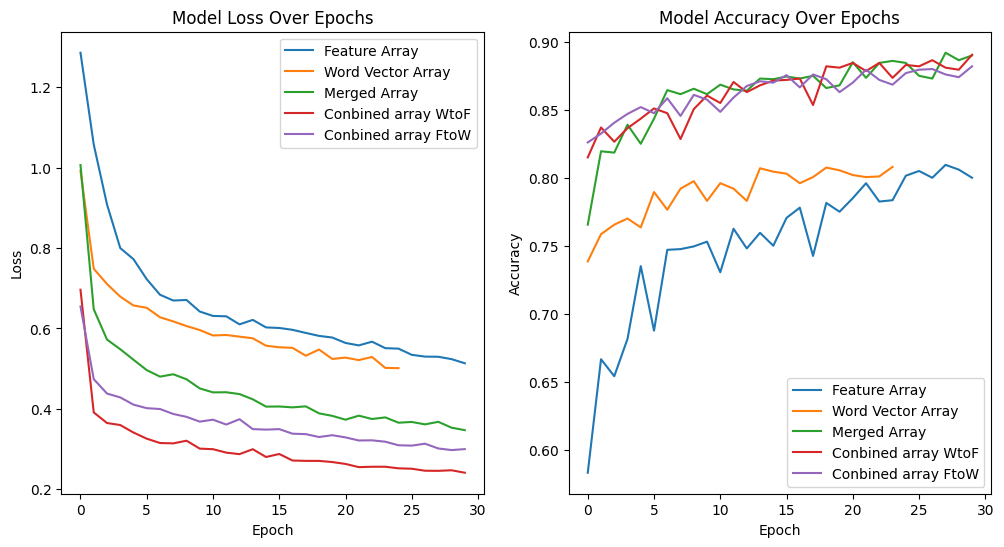

In [ ]:
# Draw losses of all features in one graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for feature_name, losses in loss_results.items():
    plt.plot(losses, label=feature_name)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Draw accuracies of all features in one graph
plt.subplot(1, 2, 2)
for feature_name, accuracies in accuracy_results.items():
    plt.plot(accuracies, label=feature_name)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()